# 5.Mass assignment schemes

### Nearest grid point method

We define the 1D particle shape as S(x) to be the mass density at the distance x from the particle for cell size $\Delta x$. In this exercise we will use periodic boundary conditions. 

$ S(x) = \frac{1}{\Delta x} \delta(\frac{x}{\Delta x})$



In [40]:
import numpy as np 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from importlib import reload
import a2_5 as a2

In [41]:
np.random.seed(121)
N = 16
positions = np.random.uniform(low=0,high=16,size=(3,1024))

"\nim = grid[0].imshow(mesh[:,:,3],vmin=0, vmax=vmax)\ngrid[0].set_title('z = 4')\nim = grid[1].imshow(mesh[:,:,8],vmin=0, vmax=vmax)\ngrid[1].set_title('z = 9')\nim = grid[2].imshow(mesh[:,:,10],vmin=0, vmax=vmax)\ngrid[2].set_title('z = 11')\nim = grid[3].imshow(mesh[:,:,13],vmin=0, vmax=vmax)\ngrid[3].set_title('z = 14')\ngrid.cbar_axes[0].colorbar(im)\nfor cax in grid.cbar_axes:\n        cax.toggle_label(True)\n        cax.set_yticks([0,1,2,3])\n#grid.axes_llc.set_xticks([-2, 0, 2])\n#grid.axes_llc.set_yticks([-2, 0, 2])\n\nplt.show()\n"

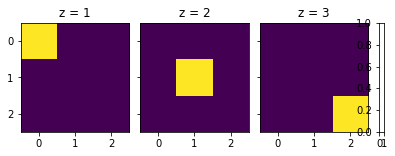

In [44]:
reload(a2)
mesh = np.zeros((N,N,N))
mesh = np.zeros((3,3,3))
positions = np.array([[0.5,1.1,2],[0.5,1.1,2],[0.5,1.1,2]])

positions_NGP = positions
mesh = a2.NGP(positions,3)

fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(1, 3),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )
vmax = np.max(mesh)

im = grid[0].imshow(mesh[:,:,0],vmin=0, vmax=vmax)
grid[0].set_title('z = 1')
im = grid[1].imshow(mesh[:,:,1],vmin=0, vmax=vmax)
grid[1].set_title('z = 2')
im = grid[2].imshow(mesh[:,:,2],vmin=0, vmax=vmax)
grid[2].set_title('z = 3')
'''
im = grid[0].imshow(mesh[:,:,3],vmin=0, vmax=vmax)
grid[0].set_title('z = 4')
im = grid[1].imshow(mesh[:,:,8],vmin=0, vmax=vmax)
grid[1].set_title('z = 9')
im = grid[2].imshow(mesh[:,:,10],vmin=0, vmax=vmax)
grid[2].set_title('z = 11')
im = grid[3].imshow(mesh[:,:,13],vmin=0, vmax=vmax)
grid[3].set_title('z = 14')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.set_yticks([0,1,2,3])
#grid.axes_llc.set_xticks([-2, 0, 2])
#grid.axes_llc.set_yticks([-2, 0, 2])

plt.show()
'''

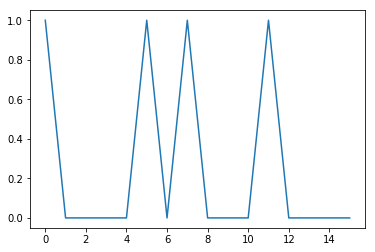

In [5]:
x = np.arange(0,16,1)
plt.plot(x,mesh[0,:,3])

### Cloud-In-Cell method


"\nvmax = np.max(mesh)\nim = grid[0].imshow(mesh[:,:,3])#,vmin=0, vmax=vmax)\ngrid[0].set_title('z = 4')\nim = grid[1].imshow(mesh[:,:,8])#,vmin=0, vmax=vmax)\ngrid[1].set_title('z = 9')\nim = grid[2].imshow(mesh[:,:,10])#,vmin=0, vmax=vmax)\ngrid[2].set_title('z = 11')\nim = grid[3].imshow(mesh[:,:,13])#,vmin=0, vmax=vmax)\ngrid[3].set_title('z = 14')\ngrid.cbar_axes[0].colorbar(im)\nfor cax in grid.cbar_axes:\n        cax.toggle_label(True)\n        \nplt.show()\n"

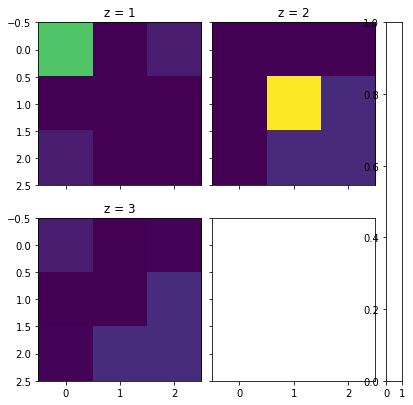

In [46]:
reload(a2)
mesh = np.zeros((N,N,N))
mesh = np.zeros((3,3,3))
positions_CIC = np.array([[0.5,1.1,2],[0.5,1.1,2],[0.5,1.1,2]])
  
mesh = a2.CiC(positions,3)
              
fig = plt.figure(1,(30,30))
grid = AxesGrid(fig, 142,
                nrows_ncols=(2, 2),
                axes_pad=(0.15,0.45),
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )

im = grid[0].imshow(mesh[:,:,0],vmin=0, vmax=vmax)
grid[0].set_title('z = 1')
im = grid[1].imshow(mesh[:,:,1],vmin=0, vmax=vmax)
grid[1].set_title('z = 2')
im = grid[2].imshow(mesh[:,:,2],vmin=0, vmax=vmax)
grid[2].set_title('z = 3')
'''
vmax = np.max(mesh)
im = grid[0].imshow(mesh[:,:,3])#,vmin=0, vmax=vmax)
grid[0].set_title('z = 4')
im = grid[1].imshow(mesh[:,:,8])#,vmin=0, vmax=vmax)
grid[1].set_title('z = 9')
im = grid[2].imshow(mesh[:,:,10])#,vmin=0, vmax=vmax)
grid[2].set_title('z = 11')
im = grid[3].imshow(mesh[:,:,13])#,vmin=0, vmax=vmax)
grid[3].set_title('z = 14')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
        cax.toggle_label(True)
        
plt.show()
'''